<a href="https://colab.research.google.com/github/Dhairya511/License-Plate-Detection/blob/main/LICENSE_PLATE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [58]:
pip install easyocr

In [59]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr


In [77]:
img1 = cv2.imread('/BMW19.jpg')
img1_gray = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
b_filter = cv2.bilateralFilter(img1_gray, 11, 17, 17)  
edges = cv2.Canny(b_filter, 30, 200)  
contours = cv2.findContours(edges.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [78]:
contours = imutils.grab_contours(contours)

In [79]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:  
        location = approx  
        break

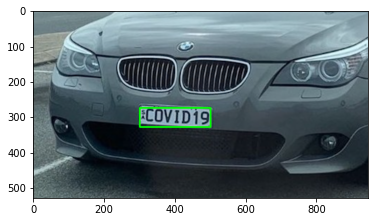

In [80]:
detect_rect = cv2.rectangle(img1, tuple(location[0][0]), tuple(location[2][0]), (0, 255, 0), 4)
plt.imshow(cv2.cvtColor(detect_rect, cv2.COLOR_BGR2RGB))
plt.show()

In [81]:
(x1, y1) = tuple(location[0][0])
(x2, y2) = tuple(location[2][0])
cropped = img1_gray[y1:y2+1, x1:x2+1]

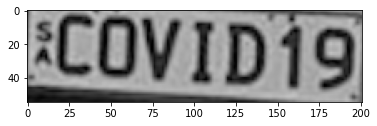

In [82]:
plt.imshow(cv2.cvtColor(cropped, cv2.COLOR_BGR2RGB))
plt.show()

In [83]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped)
print("RESULT: {}".format(result[0][0]))

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


RESULT: [[0, 0], [201, 0], [201, 55], [0, 55]]
